In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib.colors as mcolors
import os
import pandas as pd
from astropy.io import fits
from scipy.signal import fftconvolve, convolve2d

from AstroColour.AstroColour import RGB


%matplotlib widget

In [2]:
files = ['i', 'r', 'g']
f_files = []

for f in files:
    file = f'/Users/zgl12/Python_Scripts/Image_Processing/ygp/2023ygp-0011_{f}_wcs.fits.gz'

    hdu = fits.open(file)
    image_data = hdu[0].data -500
    hdu.close()

    f_files.append(image_data)

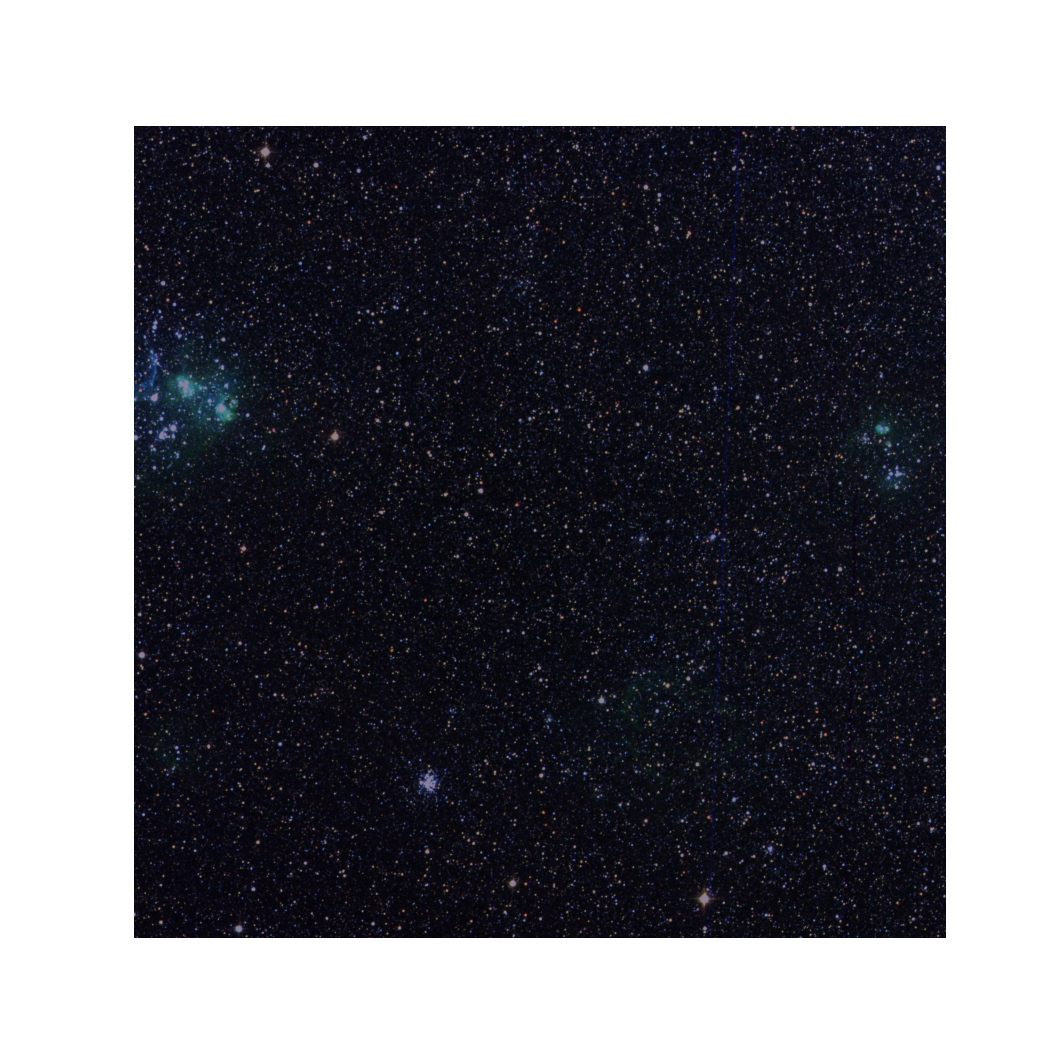

In [3]:
rgb = RGB(f_files[0], f_files[1], f_files[2], 
          colour1 = 'red', colour2 = 'green', colour3 = 'blue', 
          intensity1 = 0.55, intensity2 =1, intensity3 = 0.6, 
          upper1 = 99, lower1 = 5, upper2 = 99, lower2 = 5, upper3 = 99, lower3 = 5, 
          save = True, save_name = 'test', save_folder = '/Users/zgl12/')
colour = rgb.colour()